#id: puddleworld-v0

Implementation of Q learning

Direction considers as:
           NORTH
            ^
            |
            |
WEST <------ ------>EAST
            |
            |
            ~
          SOUTH

In [1]:
# https://github.com/ajithalbus/Options

import gym

import gridworlds

import numpy as np

from matplotlib import pyplot as plt


In [3]:
# d = {4: 4, 5: 5, 6: 4, 7: 5, 8: 4, 9: 5, 10: 4, 11: 5}
# b = [4: [4,6,8,10], 5: [5,7,9,11]]
class SmdpQL:
    def __init__(self, gamma, alpha, number_of_episodes, epsilon):
        self.Q_values = np.zeros((6, env.observation_space.n+1))
        self.gamma = gamma
        self.alpha = alpha
        
        self.number_of_episodes = number_of_episodes
        self.epsilon = epsilon
        

        self.opt_to_ind = ({ 4: 4, 5: 5 }, { 6: 4 , 7: 5}, { 8: 4, 9: 5}, { 10:4, 11: 5})
        self.ind_to_opt = ( { 4: 4, 5: 5}, { 4: 6, 5: 7}, { 4: 8, 5: 9}, { 4: 10, 5: 11})
        self.opt_to_ind_hallway = ({ 4: 4, 7: 5 }, { 6: 4, 9: 5 }, { 8: 4, 11: 5 }, { 5: 4, 10: 5 })
        self.ind_to_opt_hallway = ({ 4: 4, 5: 7 }, { 4: 6, 5: 9 }, { 4: 8, 5: 11 }, { 4: 5, 5: 10 })
        
    
    def epsilon_option(self,env, room, in_hallway):
   
        if in_hallway :
        
            l = env.hallway_option_set[room]
        else :
            l = env.option_set[room]
        
        if np.random.uniform(0,1) < self.epsilon:
            option = np.random.choice(l)
#             print("wedwedwedjnjnjnjnjjnjnjnnjnjnjnjnj", option)
            
        else:
            option = np.argmax(self.Q_values[:,env.state])
            if option > 3 :
                if in_hallway :
                    option = self.ind_to_opt_hallway[room][option]
                else :    
                    option = self.ind_to_opt[room][option]
        return option
    
    def test_option(self,env, current_state):
        
        
        option = np.argmax(self.Q_values[:,current_state])
        return option

    def update_Q_values(self,current_state, current_option, reward_generated, value, in_hallway, room):
#         print("current_option",current_option, "room", room, "in_hallway", in_hallway)
        if current_option > 3:
            if in_hallway :
                current_option = self.opt_to_ind_hallway[room][current_option]
            else :    
                current_option = self.opt_to_ind[room][current_option]
            
        error = reward_generated + ((self.gamma)*value) - self.Q_values[current_option][current_state]
        self.Q_values[current_option][current_state] = self.Q_values[current_option][current_state] + self.alpha*error
        

    
    def run_episode(self, env):
#         print("yes")
        
        current_state = env.reset()        
        step_count = 0
        total_reward = 0
        i =0
        loc_option = None
        while i<1000:
            
            in_hallway = env.in_hallway_index()
            [room, coord]= env.decode(env.state, in_hallway=in_hallway)
#             print("room",room, "coord",coord)
            if loc_option == None :
                current_option = self.epsilon_option(env, room, in_hallway)
#                 print("new_option",current_option)
            else :
                
                current_option = loc_option
#                 print("loc_option",loc_option)
                
#             print("current_option", current_option)
            next_state, reward, status,dicts  = env.step(current_option )
#             print("dicts", dicts,"i",i, "reward",reward)
#             if dicts != None:
#             print("start update")
            if in_hallway :
                acset =  env.hallway_option_set[room]
            else :
                 acset =  env.option_set[room]
#             print("optionset", acset)
            _ , _, lo_status1, lo_action_took1 = env.room_options(acset[4], room, coord, in_hallway)
            if lo_action_took1 == dicts[1] :
                if lo_status1 == False :
                    if in_hallway :
                        op = self.opt_to_ind_hallway[room][acset[4]]
                    else :    
                        op = self.opt_to_ind[room][acset[4]]
                    value = self.Q_values[op,next_state]
                    self.update_Q_values(current_state, acset[4], reward,value,  in_hallway, room)
                else :
                    value = np.max(self.Q_values[:,next_state])
                    self.update_Q_values(current_state, acset[4], reward,value,  in_hallway, room)

            _, _ , lo_status2, lo_action_took2 = env.room_options(acset[5], room, coord, in_hallway)
            if lo_action_took2 == dicts[1] :
                if lo_status2 == False :
                    if in_hallway :
                        op = self.opt_to_ind_hallway[room][acset[5]]
                    else :    
                        op = self.opt_to_ind[room][acset[5]]
                    value = self.Q_values[op,next_state]
                    self.update_Q_values(current_state, acset[5], reward,value,  in_hallway, room)
                else :
                    value = np.max(self.Q_values[:,next_state])
                    self.update_Q_values(current_state, acset[5], reward,value,  in_hallway, room)
            value = np.max(self.Q_values[:,next_state])
            self.update_Q_values(current_state, dicts[1], reward,value,  in_hallway, room)
#                 print("end_update")
            
                #update
            step_count = step_count +1
            total_reward = total_reward + reward
                
            if status == True:
#                 print("bro")
                break
            if dicts[0] == False :
                loc_option = current_option
            else : 
                loc_option = None
                
            current_state = next_state
            i +=1
#         print("maxstate", next_state, len(mo))
            
        return step_count, total_reward, 
    
    

0
1
2
3
4
5
6
7
8
9


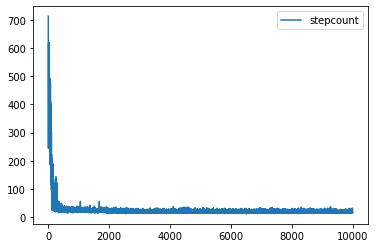

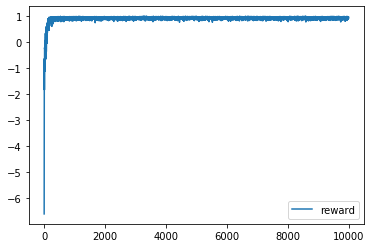

[[-7.61106459e-02 -5.66792661e-02 -7.04480089e-02 -5.39001087e-02
  -5.70192923e-02 -3.56714672e-02 -1.09610835e-02 -1.11337655e-02
  -1.22135394e-02 -3.16325331e-02 -2.97904862e-02 -7.93413643e-03
  -4.74654289e-03 -4.93557877e-03 -1.10574671e-02 -2.52910365e-03
  -7.63322839e-03  7.61025402e-03 -6.30980009e-03 -4.07193610e-02
  -4.16877548e-02  3.92349511e-02 -4.21795821e-02 -3.61311526e-02
  -3.88755852e-02 -3.70332031e-02 -3.41558839e-02 -1.25000000e-02
  -2.48437500e-02 -1.25000000e-02 -2.48437500e-02 -3.07867587e-02
  -1.21124268e-04 -1.18353554e-03 -2.42261868e-04 -1.09375000e-02
  -4.73779206e-03 -3.62531306e-04 -9.95133895e-09 -8.16652962e-08
  -9.57031250e-03 -1.03814211e-02  8.71193291e-03  3.14703302e-02
  -4.81190142e-04 -2.66561431e-03 -2.01873779e-03  3.07226146e-02
   1.03510322e-01  1.32144976e-05 -1.07852707e-03 -2.18716136e-02
  -8.53968335e-04  1.73208954e-01 -9.56363853e-03 -1.25000000e-02
   3.12287850e-01  3.61152038e-01  5.41404126e-01  6.08292414e-01
   5.58205

In [5]:
env = gym.make('FourRooms-v1')
# goal_position 0: [2,[1,2]](goal2), 1: [1,[6,2]](goal1)
x = np.arange(10000)
y_avg = []
z_avg = []



for i in range(10) :
    
    
    goal_position = 0
    
    env.set_goal(goal_position)
    obj = SmdpQL( gamma = .9, alpha = .125, number_of_episodes = 2000, epsilon  = 0.1)
    

    y = []
    z = []
    for _ in range(10000):

        a, b  = obj.run_episode( env)
#         print(a)
        y.append(a)
        z.append(b)
    y_avg.append(y)
    z_avg.append(z)
    print(i)
    
plt.plot(x, np.mean(y_avg, axis = 0 ), label="stepcount")
plt.legend()
plt.show()
plt.close()

plt.plot(x, np.mean(z_avg, axis = 0 ), label = "reward")
plt.legend()
plt.show()
print(obj.Q_values)

In [ ]:
moo = np.mean(y_avg, axis = 0 )



moo[9000]

0 hhihhih
1 hhihhih
2 hhihhih
3 hhihhih
4 hhihhih
5 hhihhih
6 hhihhih
7 hhihhih
8 hhihhih
9 hhihhih
10 hhihhih
11 hhihhih


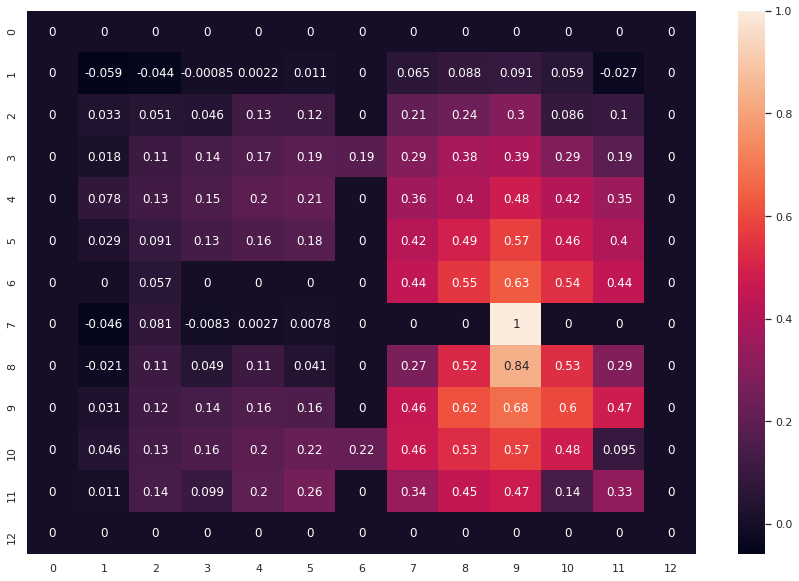

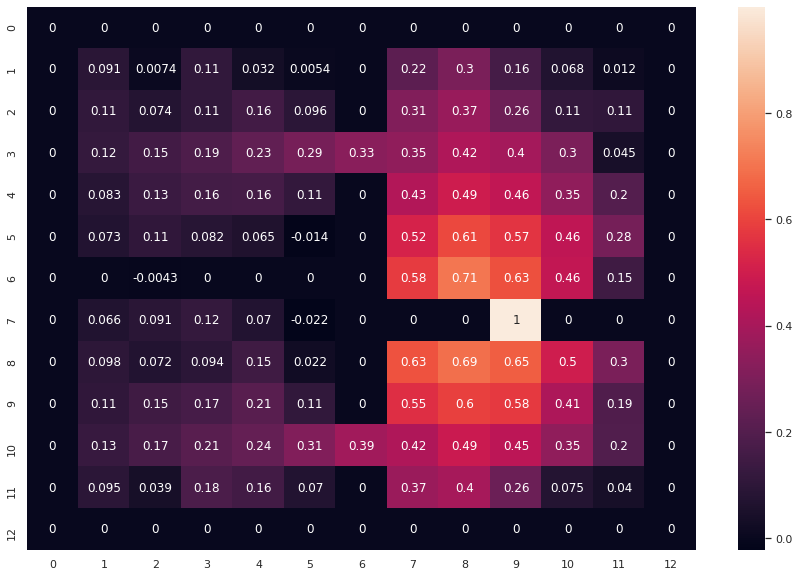

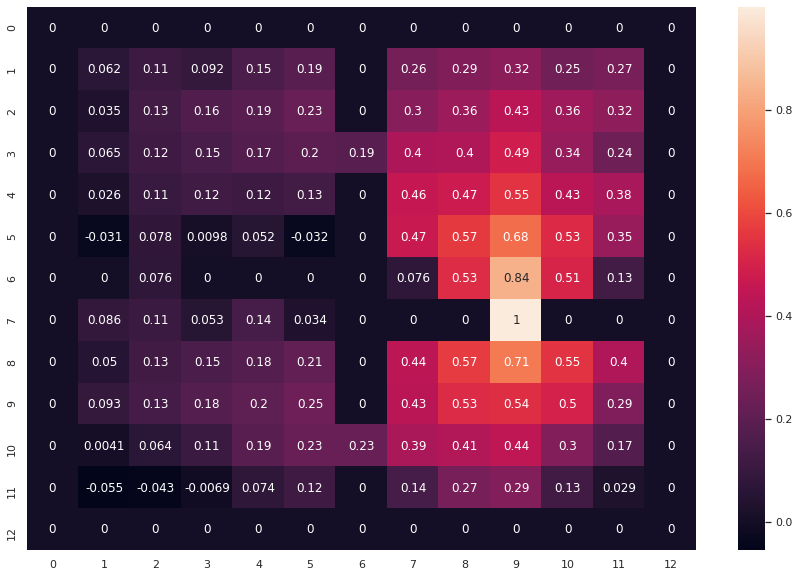

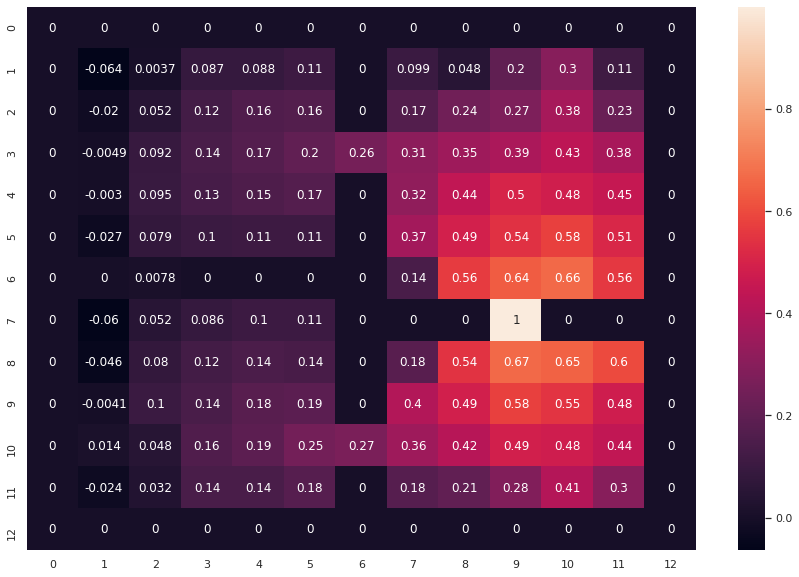

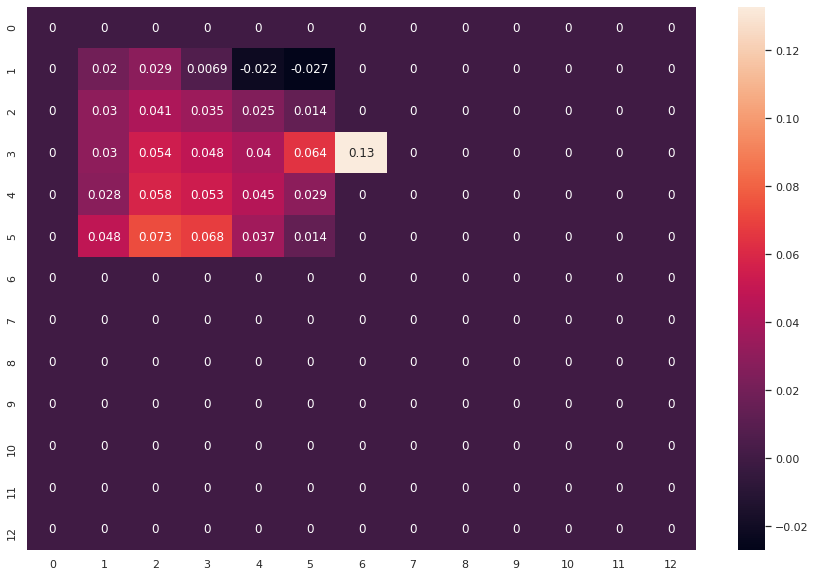

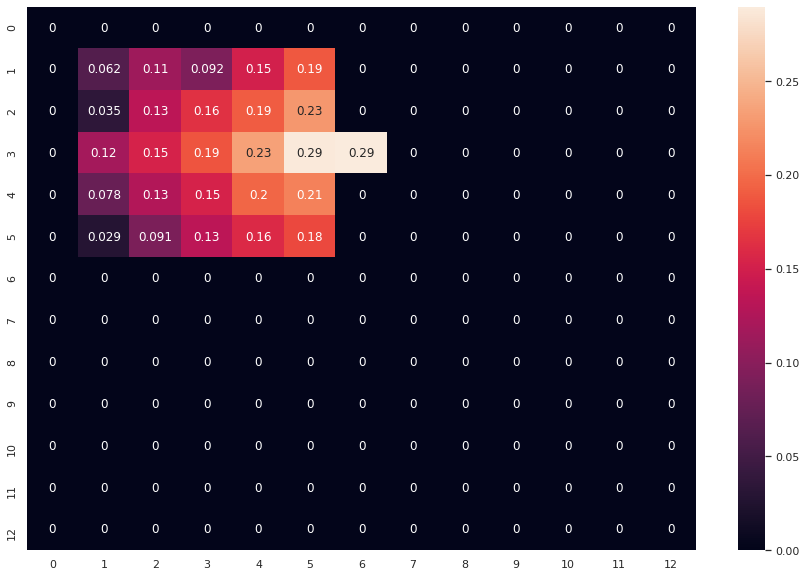

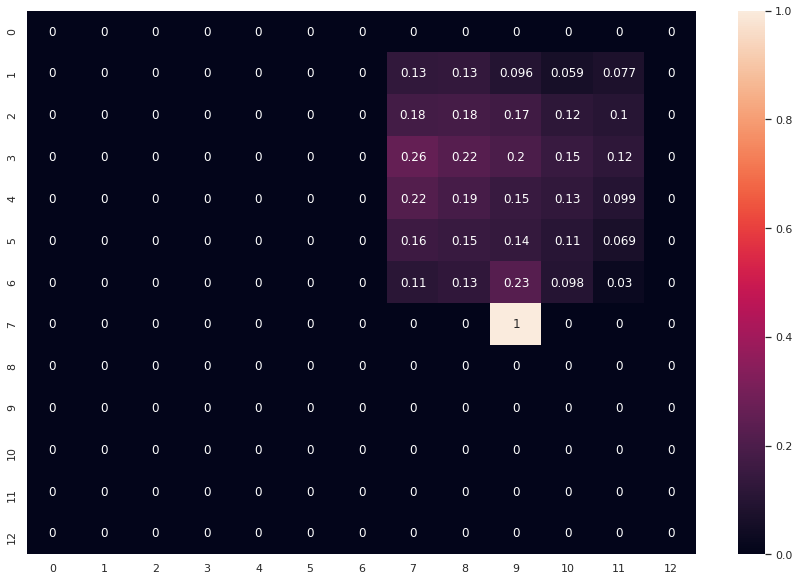

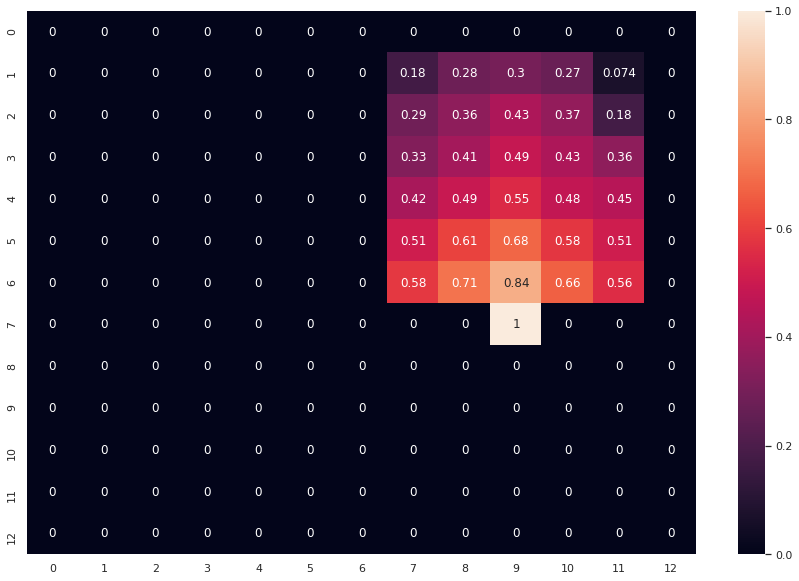

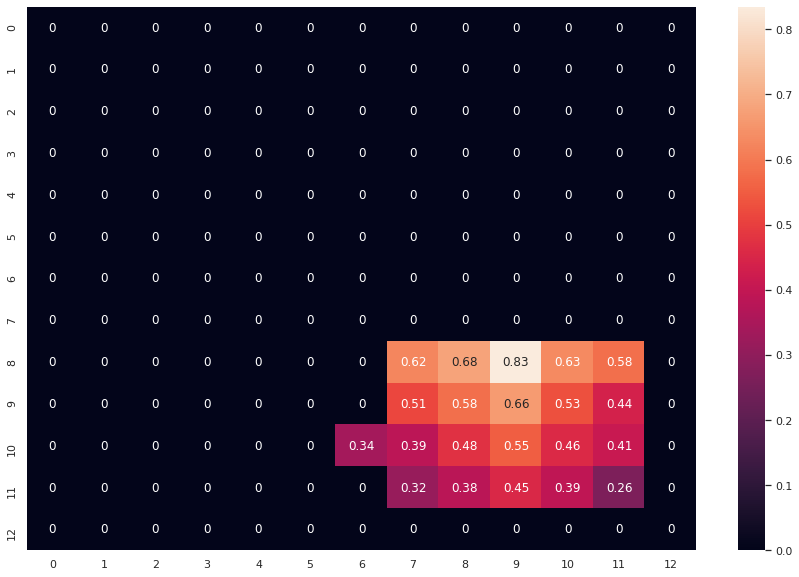

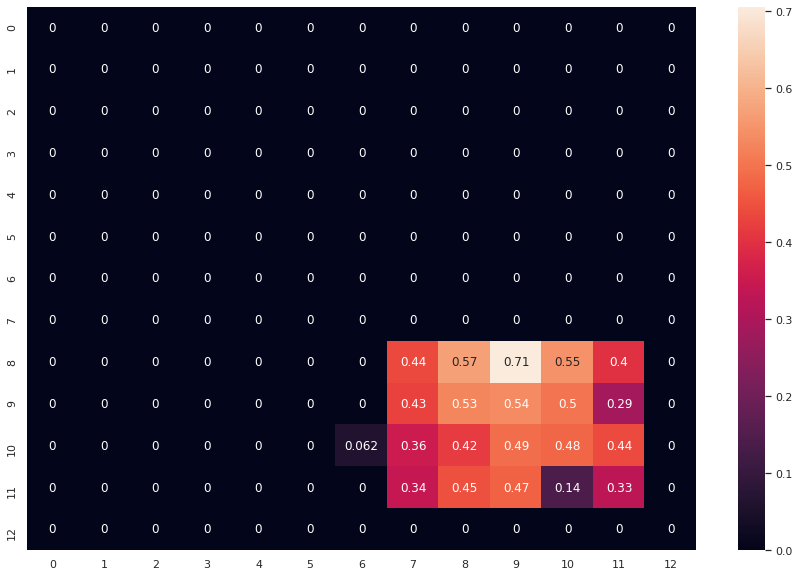

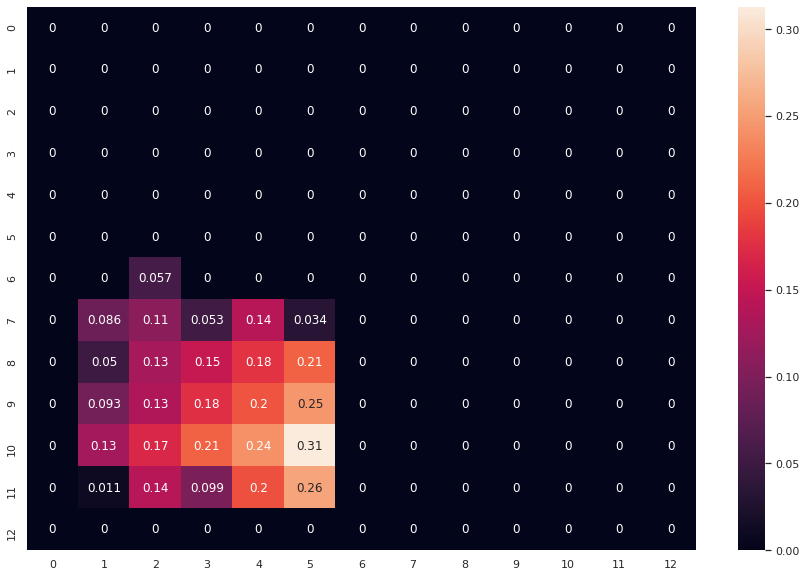

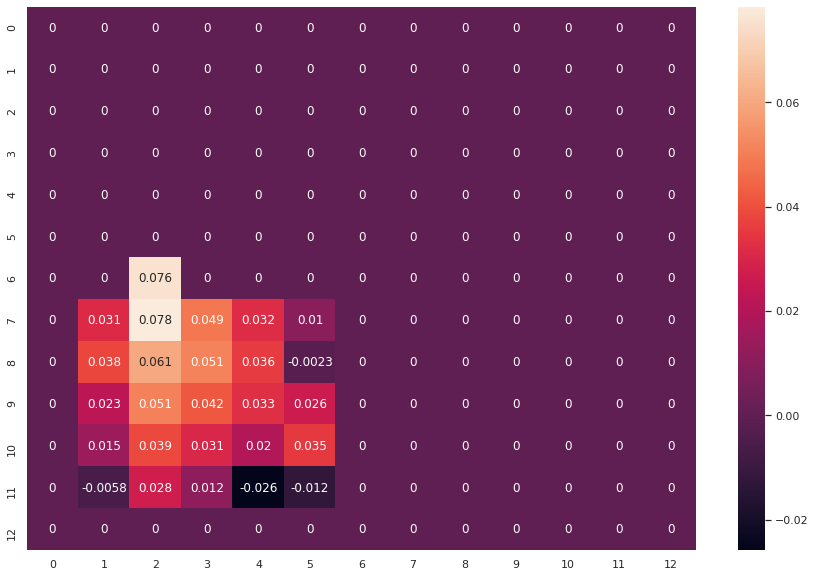

In [5]:
alplots = []
for _ in range(12):
    alplots.append(np.zeros((13,13)))

    
p = env.observation_space.n-1


for i in range(p):
    
    
#     print(max(obj.Q_values[:,i]))
    in_hallway = env.in_hallway_index(i)
    [room, coord]= env.decode(i, in_hallway=in_hallway)

    if room == 0 :        
        alplots[0][coord[0]+1][ coord[1]+1] = obj.Q_values[0,i]
        alplots[1][coord[0]+1][ coord[1]+1] = obj.Q_values[1,i]
        alplots[2][coord[0]+1][ coord[1]+1] = obj.Q_values[2,i]
        alplots[3][coord[0]+1][ coord[1]+1] = obj.Q_values[3,i]
        alplots[4][coord[0]+1][ coord[1]+1] = obj.Q_values[4,i]
        
        alplots[5][coord[0]+1][ coord[1]+1] = obj.Q_values[5,i]
    elif room == 1 :
#         print(max(obj.Q_values[:,i]))
        alplots[0][coord[0]+1][coord[1]+7] = obj.Q_values[0,i]
        alplots[1][coord[0]+1][coord[1]+7] = obj.Q_values[1,i]
        alplots[2][coord[0]+1][coord[1]+7] = obj.Q_values[2,i]
        alplots[3][coord[0]+1][coord[1]+7] = obj.Q_values[3,i]
        alplots[6][coord[0]+1][coord[1]+7] = obj.Q_values[4,i]
        alplots[7][coord[0]+1][coord[1]+7] = obj.Q_values[5,i]
    
    elif room == 2 :
#         print(max(obj.Q_values[:,i]))
        alplots[0][coord[0]+8][coord[1]+7] = obj.Q_values[0,i]
        alplots[1][coord[0]+8][coord[1]+7] = obj.Q_values[1,i]
        alplots[2][coord[0]+8][coord[1]+7] = obj.Q_values[2,i]
        alplots[3][coord[0]+8][coord[1]+7] = obj.Q_values[3,i]
        alplots[8][coord[0]+8][coord[1]+7] = obj.Q_values[4,i]
        alplots[9][coord[0]+8][coord[1]+7] = obj.Q_values[5,i]
    elif room == 3 :
#         print(max(obj.Q_values[:,i]))
        alplots[0][coord[0]+7][coord[1]+1] = obj.Q_values[0,i]
        alplots[1][coord[0]+7][coord[1]+1] = obj.Q_values[1,i]
        alplots[2][coord[0]+7][coord[1]+1] = obj.Q_values[2,i]
        alplots[3][coord[0]+7][coord[1]+1] = obj.Q_values[3,i]
        alplots[10][coord[0]+7][coord[1]+1] = obj.Q_values[4,i]
        alplots[11][coord[0]+7][coord[1]+1] = obj.Q_values[5,i]

import seaborn as sns; sns.set()
for i in range(12):

    
    
    
    plt.figure(figsize =(15,10))

    
    ax = sns.heatmap(alplots[i], annot = True)
#     ax.title("jjn")
    
    print(i,"hhihhih")
    
#     plt.close()


In [ ]:
!conda list

In [ ]:
np.argmax([-1,0,0,0,0])